# Data Loading & EDA
*   Load the CSV (no header) and assign the column names. four
*   Display first five rows, summary statistics, and the class distribution (survival_status).
* Check for missing or invalid values.




In [1]:
import pandas as pd
df = pd.read_csv('/content/haberman.data')
df.columns= ['age', 'operation_year', 'axillary_nodes', 'survival_status']

print("First 5 rows:")
display(df.head())

print("\nSummary statistics:")
display(df.describe())

print("\nClass distribution (survival_status):")
display(df['survival_status'].value_counts())

print("\nMissing values:")
display(df.isnull().sum())

First 5 rows:


,age,operation_year,axillary_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1



Summary statistics:


,age,operation_year,axillary_nodes,survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000



Class distribution (survival_status):


,count
survival_status,
1,224
2,81



Missing values:


,0
age,0
operation_year,0
axillary_nodes,0
survival_status,0


# Findings
* Class imbalance
* No missing values

In [2]:
# Percentage of survival status class
class_counts = df['survival_status'].value_counts()
class_percentages = (class_counts / len(df) * 100).round(2)

# Add % sign
class_percentages = class_percentages.astype(str) + "%"

print(class_percentages)


survival_status
1    73.44%
2    26.56%
Name: count, dtype: object


#Preprocessing
* Convert survival_status to 0/1 (0 = no, 1 = yes).
* Split into 75 % train / 25 % test (random_state=42).
* Standardize the three feature columns (age, operation_year, axillary_nodes) using StandardScaler.

In [3]:
#map survival_status of 2 to 0 and 1 to 1
df['survival_status'] = df['survival_status'].map({1: 1, 2: 0})

In [4]:
#Assign data into feature X and target y
X = df.drop('survival_status', axis=1)
y = df['survival_status']

In [5]:
# Split it into 75% and 25% ratio with random state =42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [6]:
#Standardize the three feature columns (age, operation_year, axillary_nodes) using StandardScaler.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dimensionality Reduction (Module 4)
* Apply PCA on the training features.
* Plot cumulative explained variance vs. number of components.
* Choose the smallest number of components that retain ≥ 90 % of variance and transform both train and test sets.

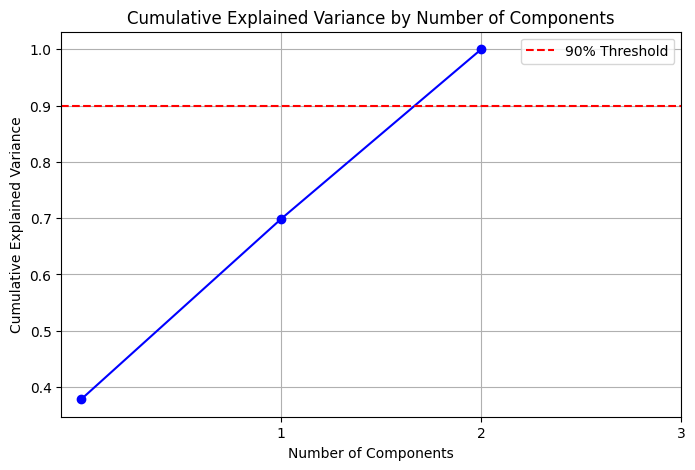

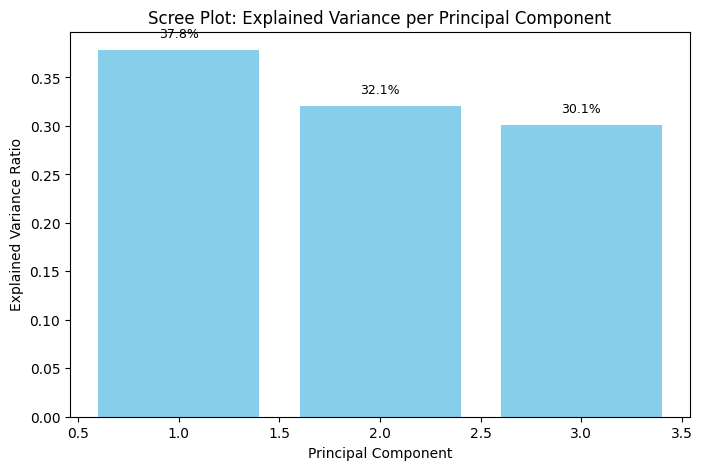

In [7]:
# Import libraries
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA on the training features
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Explained variance values
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# ----- Plot 1: Cumulative Explained Variance -----
plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='o', color='blue')
plt.axhline(y=0.90, color='red', linestyle='--', label='90% Threshold')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(explained_variance)+1))
plt.grid(True)
plt.legend()
plt.show()

# ----- Plot 2: Scree Plot with Percentages -----
plt.figure(figsize=(8,5))
components = range(1, len(explained_variance)+1)
plt.bar(components, explained_variance, color='skyblue')
plt.title('Scree Plot: Explained Variance per Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
# Add percentages on top of each bar
for i, var in enumerate(explained_variance):
    plt.text(i + 1, var + 0.01, f"{var*100:.1f}%", ha='center', va='bottom', fontsize=9)

#plt.xticks(components)
#plt.grid(axis='y')
plt.show()


# Findings
* Number of components to consider using graph  (>90% ) of cumulative explained variance and scree plot is 3


In [10]:
# Choose 3 components
pca_3 = PCA(n_components=3)

# Fit PCA on training data and transform
X_train_pca_3 = pca_3.fit_transform(X_train_scaled)

# Transform test data using the same PCA
X_test_pca_3 = pca_3.transform(X_test_scaled)

# Convert to DataFrame for easy viewing
pca_3_df_train = pd.DataFrame(X_train_pca_3, columns=['PC1', 'PC2', 'PC3'])
pca_3_df_test = pd.DataFrame(X_test_pca_3, columns=['PC1', 'PC2', 'PC3'])

# Show first few rows
print("Training data (first 5 rows) after PCA:")
print(pca_3_df_train.head())
print("\nTest data (first 5 rows) after PCA:")
print(pca_3_df_test.head())


Training data (first 5 rows) after PCA:
        PC1       PC2       PC3
0 -1.396825 -1.527242  0.418335
1 -0.568284 -1.163826  0.881651
2 -0.902051 -0.748060 -1.046244
3  0.704794 -0.272100  0.830327
4 -1.114358 -1.296078  0.117837

Test data (first 5 rows) after PCA:
        PC1       PC2       PC3
0 -0.059844 -0.747731  0.340755
1 -0.235582 -0.681790 -0.368786
2 -0.028469 -0.826935  0.755625
3  0.267191  0.447340 -0.664030
4  1.462024  0.361978  1.286056


# 4. Supervised Learning
## Train Logistic Regression and Decision Tree classifiers on the PCA-transformed training data.
For each model, compare two hyperparameter settings:
Logistic Regression: C = [0.1, 1.0]
Decision Tree: max_depth = [3, None]
Use 5-fold cross-validation on the training set to compute mean accuracy for each setting.

# Logistic Regression with C=0.1

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create Logistic Regression model with C=0.1
logreg = LogisticRegression(C=0.1)

# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(logreg, X_train_pca_3, y_train, cv=5, scoring='accuracy')

# Compute mean accuracy
mean_accuracy = cv_scores.mean()*100
print(f"Mean 5-Fold cross validation (CV) Accuracy with Logestic Regression (C=0.1) is  {mean_accuracy:.2f}%")

Mean 5-Fold cross validation (CV) Accuracy with Logestic Regression (C=0.1) is  74.11%


# Logistic Regression with C=1

In [12]:
# Create Logistic Regression model with C=0.1
logreg = LogisticRegression(C=1)

# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(logreg, X_train_pca_3, y_train, cv=5, scoring='accuracy')

# Compute mean accuracy
mean_accuracy = cv_scores.mean()*100
print(f"Mean 5-Fold cross validation (CV) Accuracy with Logestic Regression (C=1) is  {mean_accuracy:.2f}%")


Mean 5-Fold cross validation (CV) Accuracy with Logestic Regression (C=1) is  74.11%


# Decision Tree with max_depth = 3

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree model with max_depth = 3
dt_model = DecisionTreeClassifier(max_depth=3)

# Perform 5-fold cross-validation on the training set
dt_cv_scores = cross_val_score(dt_model, X_train_pca_3, y_train, cv=5, scoring='accuracy')

# Compute mean accuracy
dt_mean_accuracy = dt_cv_scores.mean() * 100
print(f"Mean 5-Fold Cross Validation (CV) Accuracy with Decision Tree (max_depth=3) is {dt_mean_accuracy:.2f}%")


Mean 5-Fold Cross Validation (CV) Accuracy with Decision Tree (max_depth=3) is 70.61%


In [14]:
# Create Decision Tree model with max_depth = 3
dt_model = DecisionTreeClassifier(max_depth=None)

# Perform 5-fold cross-validation on the training set
dt_cv_scores = cross_val_score(dt_model, X_train_pca_3, y_train, cv=5, scoring='accuracy')

# Compute mean accuracy
dt_mean_accuracy = dt_cv_scores.mean() * 100
print(f"Mean 5-Fold Cross Validation (CV) Accuracy with Decision Tree (max_depth=NOne) is {dt_mean_accuracy:.2f}%")


Mean 5-Fold Cross Validation (CV) Accuracy with Decision Tree (max_depth=NOne) is 64.45%


# 5. Model Evaluation & Optimization
On the test set (PCA-transformed), for each model’s best hyperparameter setting, compute:Accuracy, precision, recall, F₁-score, ROC curve and AUC
Plot both models’ ROC curves on the same axes and discuss which is preferable and why.


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
# Models with best hyperparameter settings
# Logistic Regression (best C=1) and Decision Tree (best max_depth=3)
logreg_model = LogisticRegression(C=1)
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Fit Models on Training Data
logreg_model.fit(X_train_pca_3, y_train)
dt_model.fit(X_train_pca_3, y_train)

# Predict
y_pred_logreg = logreg_model.predict(X_test_pca_3)
y_pred_dt = dt_model.predict(X_test_pca_3)
# 4. Compute evaluation metrics
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1-score:", f1_logreg)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("\nDecision Tree Performance:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)

Logistic Regression Performance:
Accuracy: 0.7532467532467533
Precision: 0.7638888888888888
Recall: 0.9649122807017544
F1-score: 0.8527131782945736

Decision Tree Performance:
Accuracy: 0.7272727272727273
Precision: 0.8
Recall: 0.8421052631578947
F1-score: 0.8205128205128205


Model Comparison Summary
Metric	Logistic Regression	Decision Tree	Better
Accuracy	0.7532	0.7273	Logistic Regression
Precision	0.7639	0.8000	Decision Tree
Recall	0.9649	0.8421	Logistic Regression
F1-score	0.8527	0.8205	Logistic Regression

Logestic Regression AUC = 0.70
Decision Tree AUC = 0.66


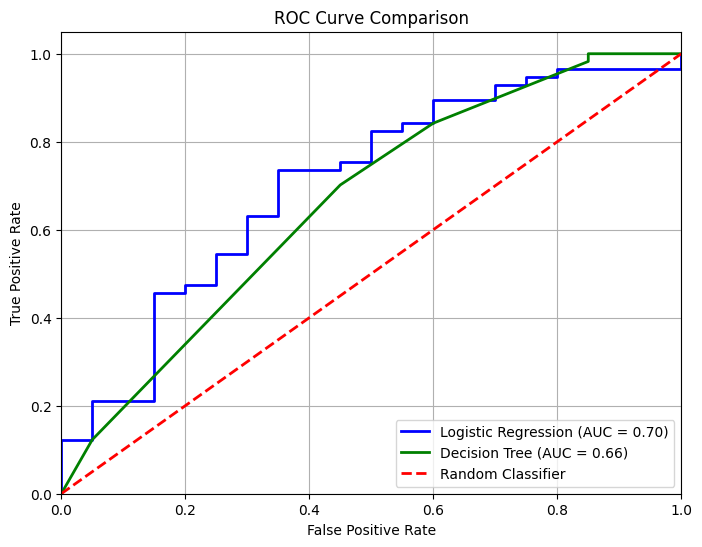

In [35]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Compute predicted probabilities for ROC curve
y_prob_logreg = logreg_model.predict_proba(X_test_pca_3)[:, 1]
y_prob_dt = dt_model.predict_proba(X_test_pca_3)[:, 1]

# Compute ROC curve and AUC for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
auc_logreg = auc(fpr_logreg, tpr_logreg)
print (f'Logestic Regression AUC = {auc_logreg:.2f}')
# Compute ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = auc(fpr_dt, tpr_dt)
print (f'Decision Tree AUC = {auc_dt:.2f}')
# Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
